Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Càrrega i pre-processament de les dades

In [2]:
datafile = "data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(datafile)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df["ever_married"] = df["ever_married"].map({'Yes': 1, 'No': 0})
df['stroke'] = df['stroke'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['smoking_status', "work_type", "Residence_type"])
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creació i test de l'arbre de decissió

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) 
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.92
Precision: 0.91
Recall: 0.92
F1 Score: 0.91

Confusion Matrix:
[[923  37]
 [ 49  13]]


## Visualització de l'arbre de decisió

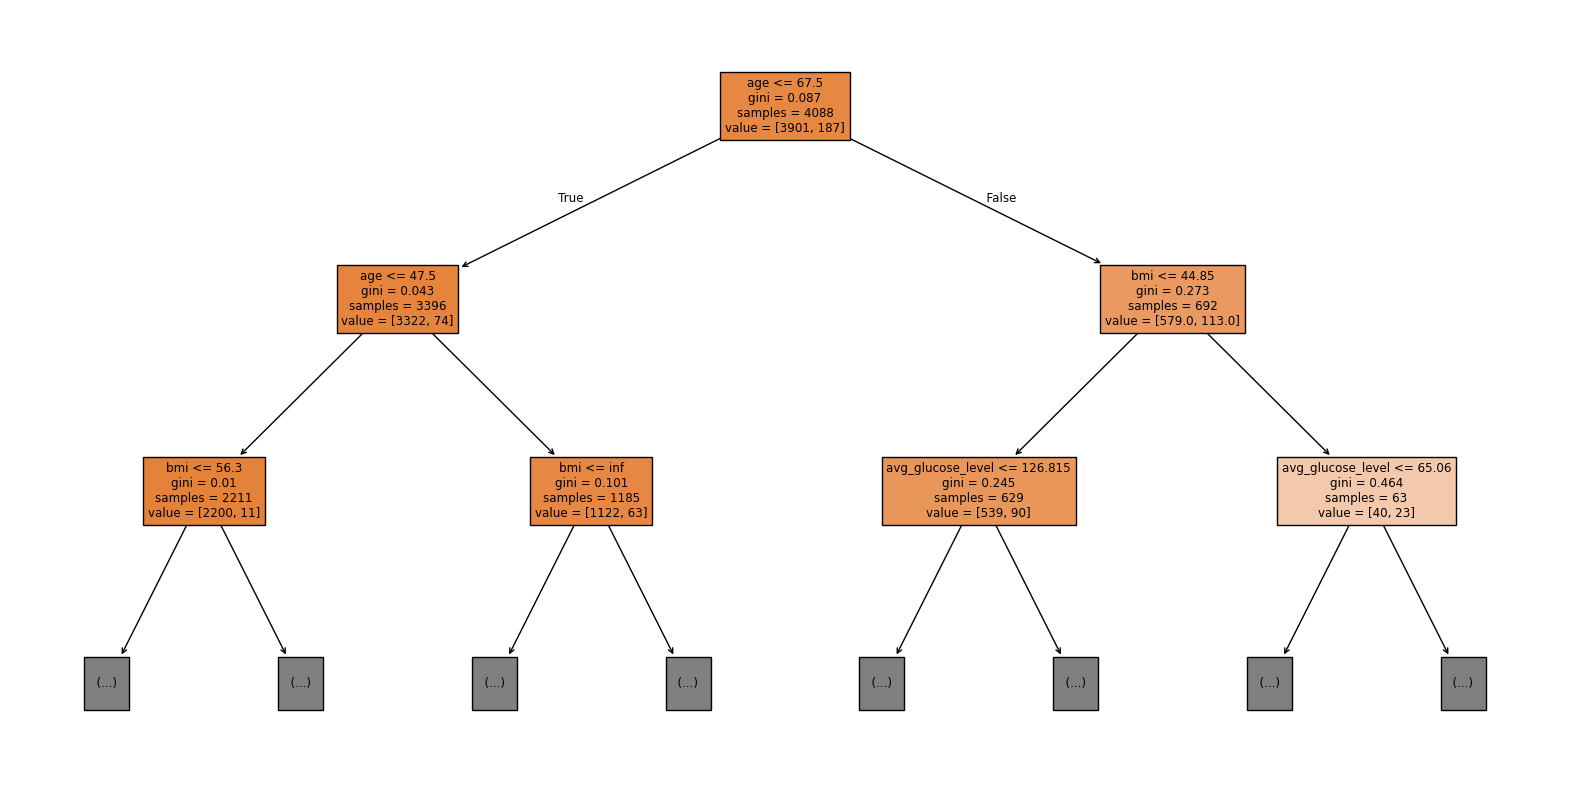

In [5]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

## Visualització dels factors més importants pel model

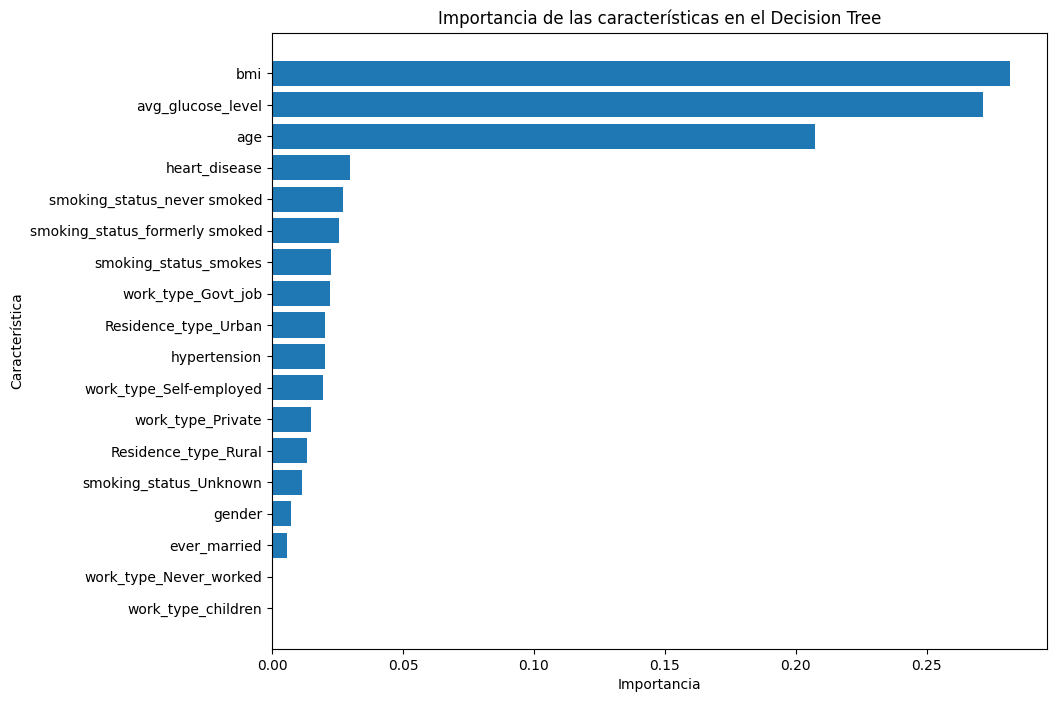

In [6]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## Li treiem les tres característiques més importants segons el gràfic generat

In [8]:
X = df.drop(columns=['id', 'stroke', "bmi", "avg_glucose_level", "age"])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) 
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.94
Precision: 0.90
Recall: 0.94
F1 Score: 0.91

Confusion Matrix:
[[955   5]
 [ 60   2]]


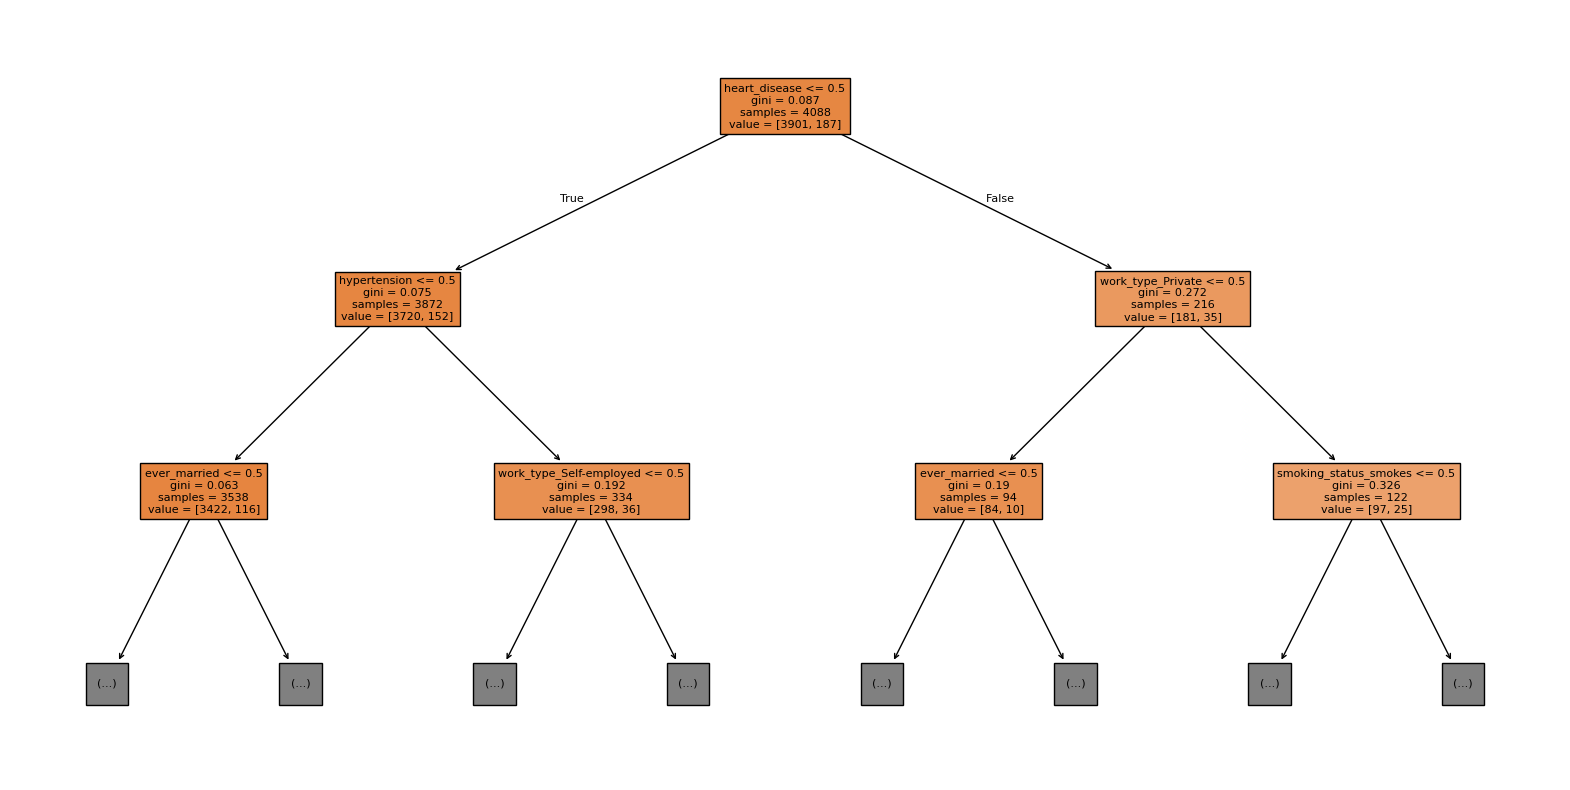

In [8]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

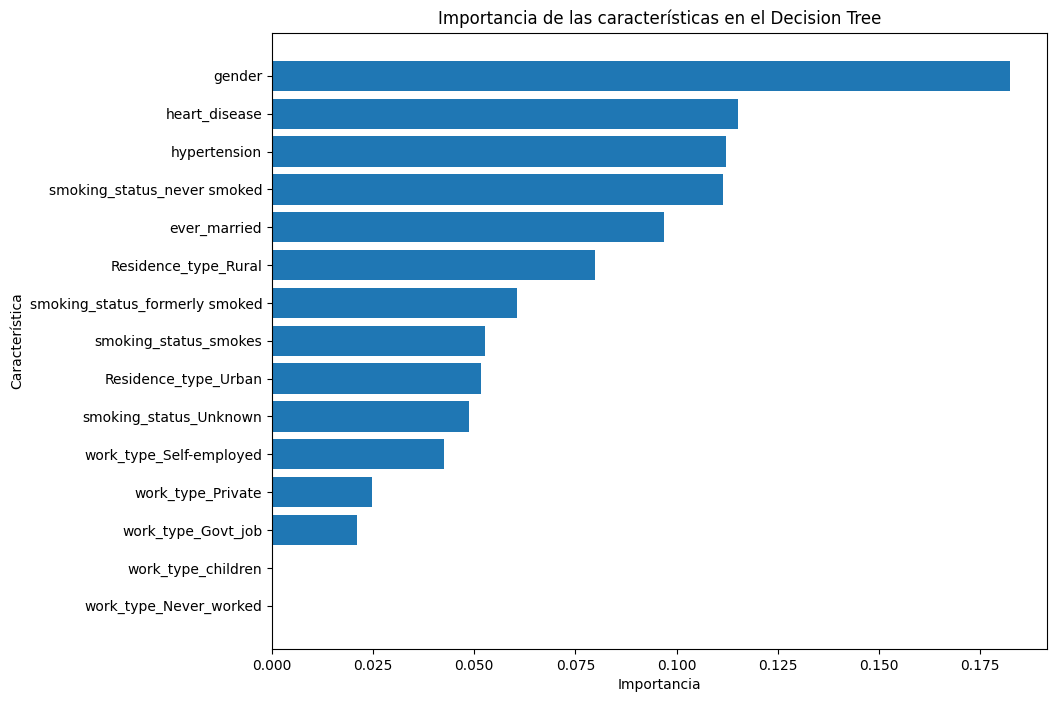

In [9]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()